# **1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.**

a.
$$\begin{cases} x_1 + 2x_2 = 0 \\ x_1 - x_2 = 0 \end{cases}$$

b.
$$\begin{cases} x_1 + 2x_2 = 3 \\ -2x_1 - 4x_2 = 6 \end{cases}$$

c.
$$\begin{cases} 2x_1 + x_2 = -1 \\ x_1 + x_2 = 2 \\ x_1 - 3x_2 = 5 \end{cases}$$

d.
$$\begin{cases} 2x_1 + x_2 + x_3 = 1 \\ 2x_1 + 4x_2 - x_3 = -1 \end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def solve_and_plot_system(A, b, variables):
    """
    Resuelve y visualiza un sistema de ecuaciones lineales Ax = b.

    Args:
        A (list or np.array): Matriz de coeficientes.
        b (list or np.array): Vector de términos constantes.
        variables (list of str): Nombres de las variables (ej. ['x₁', 'x₂']).
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    num_equations, num_vars = A.shape

    print(f"Sistema con {num_equations} ecuaciones y {num_vars} variables.")
    print("Matriz A:\n", A)
    print("\nVector b:\n", b)

    solution = None
    interpretation = ""

    # --- Solución Numérica ---
    try:
        if num_equations >= num_vars:
            # Para sistemas cuadrados o sobredeterminados, usamos mínimos cuadrados
            x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
            if np.allclose(A @ x, b):
                solution = x
                interpretation = f"El sistema es consistente. Solución encontrada: {np.round(solution, 2)}"
            else:
                interpretation = "El sistema es inconsistente (no tiene solución). Las líneas/planos no se intersectan en un único punto."
        else: # Sistema subdeterminado
            # Comprobamos la consistencia con los rangos
            rank_A = np.linalg.matrix_rank(A)
            rank_Ab = np.linalg.matrix_rank(np.c_[A, b])
            if rank_A == rank_Ab:
                interpretation = "El sistema tiene infinitas soluciones."
                if num_vars == 3 and num_equations == 2:
                    interpretation += " La intersección de los dos planos forma una línea."
            else:
                interpretation = "El sistema es inconsistente (sin solución)."

    except np.linalg.LinAlgError as e:
        # Caso de matriz singular para np.linalg.solve (no usado aquí, pero es buena práctica)
        interpretation = f"Error de álgebra lineal: {e}. El sistema puede ser singular."

    # Verificación final para casos especiales (líneas paralelas/coincidentes)
    if num_vars == 2 and num_equations == 2:
        det_A = np.linalg.det(A)
        if np.isclose(det_A, 0):
            # Rango de A y [A|b]
            rank_A = np.linalg.matrix_rank(A)
            rank_Ab = np.linalg.matrix_rank(np.c_[A, b])
            if rank_A < rank_Ab:
                interpretation = "El sistema no tiene solución. Geométricamente, son líneas paralelas distintas."
            else:
                interpretation = "El sistema tiene infinitas soluciones. Geométricamente, las líneas son coincidentes."

    print("\nInterpretación: " + interpretation)

    # --- Visualización Gráfica ---
    if num_vars > 3:
        print("\nNo es posible realizar una gráfica para sistemas con más de 3 variables.")
        return

    fig = plt.figure(figsize=(9, 8))
    
    if num_vars == 2:
        ax = fig.add_subplot(111)
        ax.set_title("Interpretación Geométrica (2D)")
        x_vals = np.linspace(-5, 5, 400)
        
        for i in range(num_equations):
            if not np.isclose(A[i, 1], 0):
                y_vals = (b[i] - A[i, 0] * x_vals) / A[i, 1]
                ax.plot(x_vals, y_vals, label=f'Ecuación {i+1}')
            else:
                x_vert = b[i] / A[i, 0]
                ax.axvline(x=x_vert, label=f'Ecuación {i+1}', color=f'C{i}')

        if solution is not None and len(solution) == 2:
            ax.plot(solution[0], solution[1], 'ro', markersize=10, label='Solución')

        ax.set_xlabel(variables[0])
        ax.set_ylabel(variables[1])
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.legend()
        ax.axis('equal')

    elif num_vars == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("Interpretación Geométrica (3D)")
        x_surf = np.linspace(-5, 5, 50)
        y_surf = np.linspace(-5, 5, 50)
        X, Y = np.meshgrid(x_surf, y_surf)

        colors = plt.cm.viridis(np.linspace(0, 1, num_equations))
        for i in range(num_equations):
            if not np.isclose(A[i, 2], 0):
                Z = (b[i] - A[i, 0] * X - A[i, 1] * Y) / A[i, 2]
                ax.plot_surface(X, Y, Z, alpha=0.7, color=colors[i], label=f'Plano {i+1}')
        
        if num_equations == 2 and "infinitas" in interpretation:
            try:
                dir_vec = np.cross(A[0], A[1])
                A_2x2 = A[:, :2]
                p_on_line_xy = np.linalg.solve(A_2x2, b)
                p_on_line = np.array([p_on_line_xy[0], p_on_line_xy[1], 0])
                t = np.linspace(-5, 5, 100)
                line_points = p_on_line.reshape(-1, 1) + dir_vec.reshape(-1, 1) * t
                ax.plot(line_points[0, :], line_points[1, :], line_points[2, :], 'k-', linewidth=4, label='Línea de Intersección')
            except np.linalg.LinAlgError:
                pass

        if solution is not None and len(solution) == 3:
            ax.scatter(solution[0], solution[1], solution[2], color='r', s=150, marker='o', depthshade=True, label='Solución')

        ax.set_xlabel(variables[0])
        ax.set_ylabel(variables[1])
        ax.set_zlabel(variables[2])
        ax.view_init(elev=20, azim=-65)

    plt.show()

Sistema con 2 ecuaciones y 2 variables.
Matriz A:
 [[ 1.  2.]
 [ 1. -1.]]

Vector b:
 [0. 0.]

Interpretación: El sistema es consistente. Solución encontrada: [0. 0.]


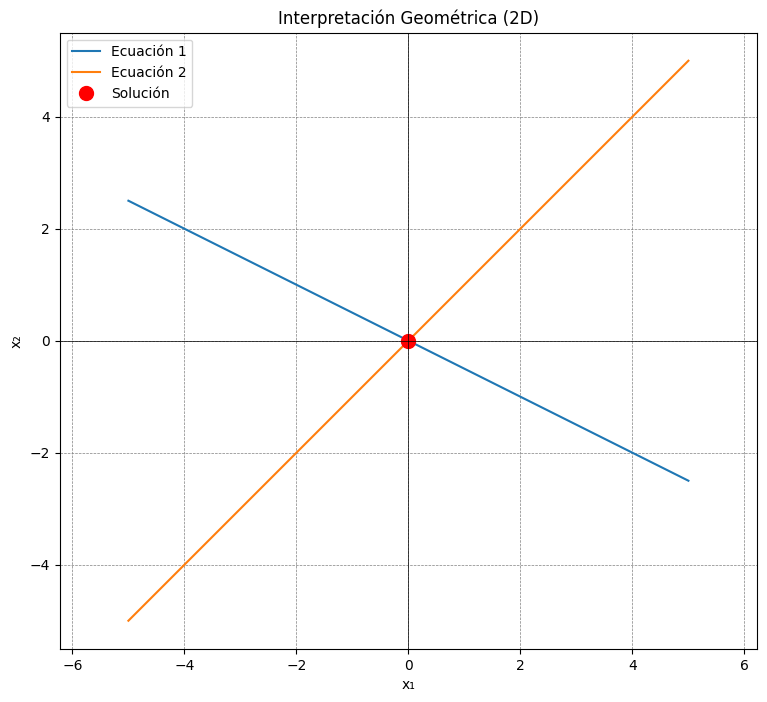

In [2]:
A_ejemplo = [[1, 2], 
             [1, -1]]

b_ejemplo = [0, 0]
variables_ejemplo = ['x₁', 'x₂']
solve_and_plot_system(A_ejemplo, b_ejemplo, variables_ejemplo)

Sistema con 2 ecuaciones y 2 variables.
Matriz A:
 [[ 1.  2.]
 [-2. -4.]]

Vector b:
 [3. 6.]

Interpretación: El sistema no tiene solución. Geométricamente, son líneas paralelas distintas.


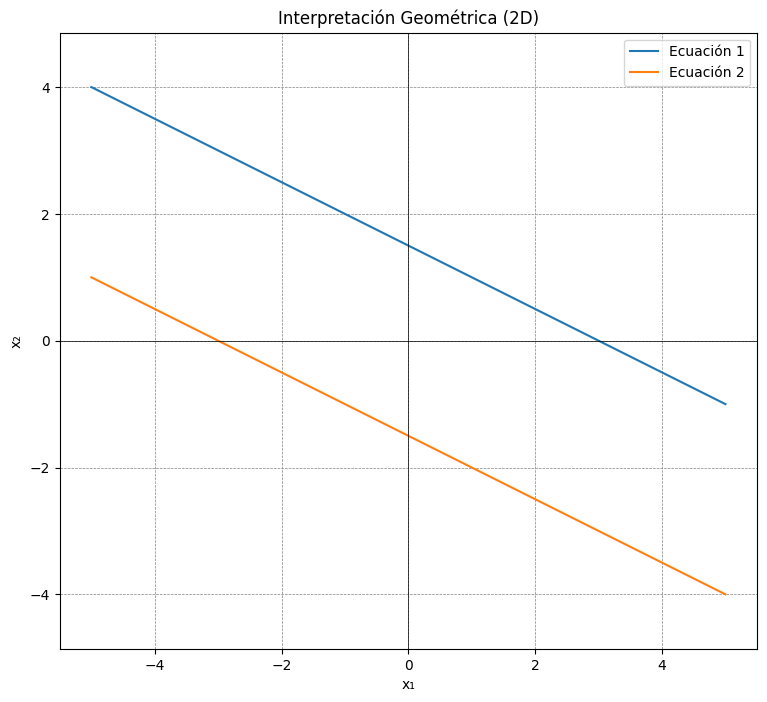

In [3]:
A_ejemplo = [[1, 2], 
             [-2, -4]]

b_ejemplo = [3, 6]
variables_ejemplo = ['x₁', 'x₂']
solve_and_plot_system(A_ejemplo, b_ejemplo, variables_ejemplo)

Sistema con 3 ecuaciones y 2 variables.
Matriz A:
 [[ 2.  1.]
 [ 1.  1.]
 [ 1. -3.]]

Vector b:
 [-1.  2.  5.]

Interpretación: El sistema es inconsistente (no tiene solución). Las líneas/planos no se intersectan en un único punto.


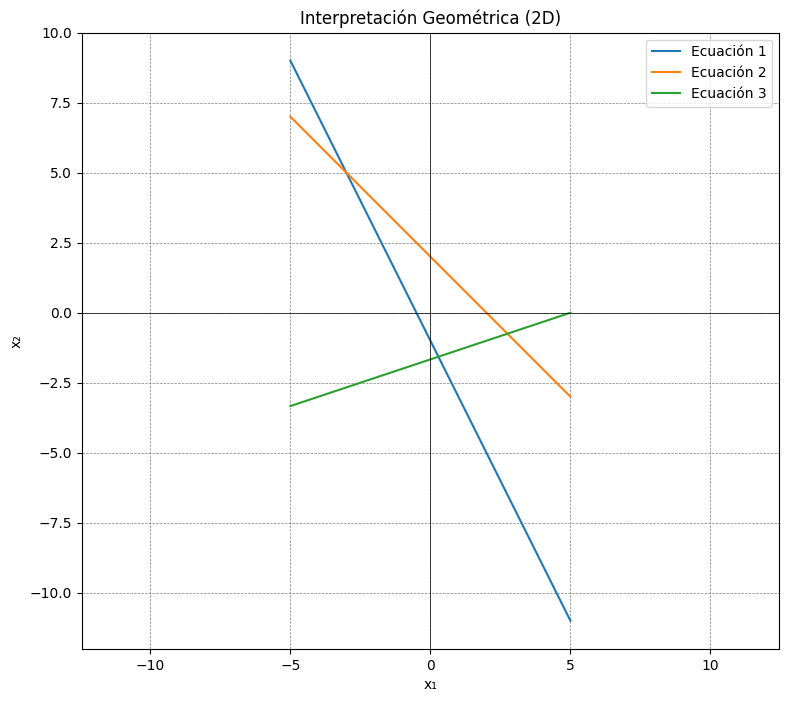

In [4]:
A_ejemplo = [[2, 1], 
             [1, 1],
             [1, -3]]

b_ejemplo = [-1, 2, 5]
variables_ejemplo = ['x₁', 'x₂', 'x₃']
solve_and_plot_system(A_ejemplo, b_ejemplo, variables_ejemplo)

Sistema con 2 ecuaciones y 3 variables.
Matriz A:
 [[ 2.  1.  1.]
 [ 2.  4. -1.]]

Vector b:
 [ 1. -1.]

Interpretación: El sistema tiene infinitas soluciones. La intersección de los dos planos forma una línea.


IndexError: list index out of range

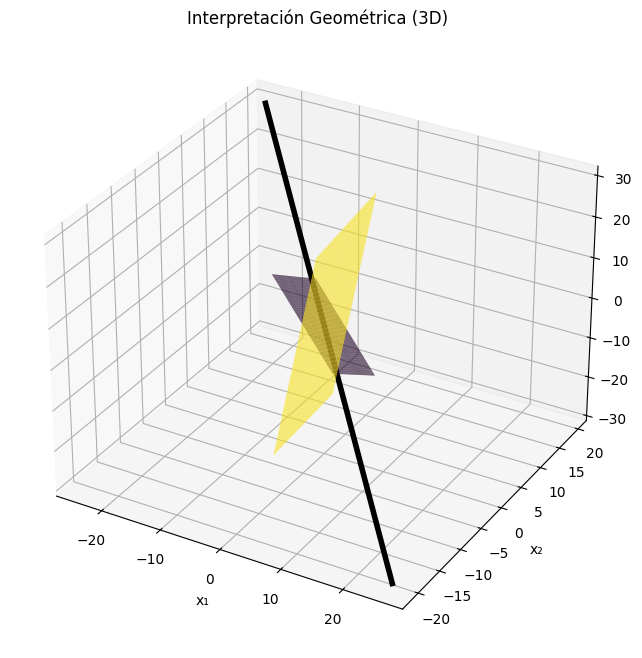

In [5]:
A_ejemplo = [[2, 1, 1], 
             [2, 4, -1]]

b_ejemplo = [1, -1]
variables_ejemplo = ['x₁', 'x₂']
solve_and_plot_system(A_ejemplo, b_ejemplo, variables_ejemplo)

# **2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $x_1 = -1, x_2 = 2, x_3 = 3$.)**

a.
$$
\begin{cases}
-x_1 + 4x_2 + x_3 = 8 \\
\frac{5}{3}x_1 + \frac{2}{3}x_2 + \frac{2}{3}x_3 = 1 \\
2x_1 + x_2 + 4x_3 = 11
\end{cases}
$$

b.
$$
\begin{cases}
4x_1 + 2x_2 - x_3 = -5 \\
\frac{1}{9}x_1 + \frac{1}{9}x_2 - \frac{1}{3}x_3 = -1 \\
x_1 + 4x_2 + 2x_3 = 9
\end{cases}
$$

In [6]:
import numpy as np

def round_to_digits(n, digits=2):
    """
    Redondea un número a una cantidad específica de dígitos significativos.
    """
    if n == 0:
        return 0
    # Usar formato de notación científica para redondear a dígitos significativos
    # Ejemplo: round_to_digits(0.0123, 2) -> 0.012
    # Ejemplo: round_to_digits(12345, 2) -> 12000.0
    format_string = f"{{:.{digits-1}e}}"
    return float(format_string.format(n))

def solve_gauss_with_rounding(A, b, digits, exact_solution=None):
    """
    Resuelve un sistema de ecuaciones Ax=b usando eliminación gaussiana
    con sustitución hacia atrás y aritmética de redondeo.

    Args:
        A (list of lists): Matriz de coeficientes.
        b (list): Vector de términos constantes.
        digits (int): El número de dígitos significativos para el redondeo.
        exact_solution (list, optional): La solución exacta para calcular el error.
    """
    # 1. Configuración inicial y redondeo de entradas
    A_float = np.array(A, dtype=float)
    b_float = np.array(b, dtype=float).reshape(-1, 1)
    n = len(b_float)

    # Redondear la matriz y el vector iniciales a la precisión dada
    A_rounded = np.vectorize(lambda x: round_to_digits(x, digits))(A_float)
    b_rounded = np.vectorize(lambda x: round_to_digits(x, digits))(b_float)
    
    augmented_matrix = np.hstack([A_rounded, b_rounded])
    print("--- PASO 1: Matriz Aumentada Inicial (con redondeo) ---")
    print(augmented_matrix)
    print("-" * 50)

    # 2. Eliminación Gaussiana (hacia adelante)
    print("--- PASO 2: Eliminación Gaussiana con Redondeo ---")
    M = np.copy(augmented_matrix)

    for i in range(n):
        pivot = M[i, i]
        if pivot == 0:
            print("Error: Elemento pivote es cero. No se puede continuar sin reordenar.")
            return None

        for j in range(i + 1, n):
            # Calcular el multiplicador y redondearlo
            multiplier = round_to_digits(M[j, i] / pivot, digits)
            print(f"\nPaso: F{j+1} = F{j+1} - ({multiplier}) * F{i+1}")

            # Aplicar la transformación a la fila, redondeando en cada operación
            for k in range(i, n + 1):
                term = round_to_digits(multiplier * M[i, k], digits)
                new_val = round_to_digits(M[j, k] - term, digits)
                M[j, k] = new_val
            
            print("Matriz actual:\n", M)

    print("-" * 50)
    print("--- PASO 3: Matriz Triangular Superior Resultante ---")
    print(M)
    print("-" * 50)

    # 3. Sustitución hacia atrás
    print("--- PASO 4: Sustitución hacia atrás con Redondeo ---")
    x = np.zeros(n)
    
    # Resolver para la última variable
    val = M[n - 1, n] / M[n - 1, n - 1]
    x[n - 1] = round_to_digits(val, digits)
    print(f"x{n} = {M[n-1, n]} / {M[n-1, n-1]} = {val:.4f} -> (redondeo) -> {x[n-1]}")

    # Resolver para las variables restantes
    for i in range(n - 2, -1, -1):
        sum_val = 0
        # Calcular la suma de términos conocidos, redondeando en cada paso
        for j in range(i + 1, n):
            term = round_to_digits(M[i, j] * x[j], digits)
            sum_val = round_to_digits(sum_val + term, digits)
        
        # Calcular el valor de la variable actual, redondeando en cada paso
        numerator = round_to_digits(M[i, n] - sum_val, digits)
        denominator = M[i, i]
        val = numerator / denominator
        x[i] = round_to_digits(val, digits)
        print(f"x{i+1} = ({M[i,n]} - {sum_val}) / {denominator} = {val:.4f} -> (redondeo) -> {x[i]}")

    print("-" * 50)
    print("--- PASO 5: Resultados Finales ---")
    print("Solución Calculada (con redondeo):", x)

    # 4. Cálculo de Error
    if exact_solution is not None:
        exact_solution = np.array(exact_solution)
        absolute_error = np.abs(exact_solution - x)
        print("Solución Exacta:", exact_solution)
        print("Error Absoluto:", absolute_error)
        # Prevenir división por cero en el error relativo
        with np.errstate(divide='ignore', invalid='ignore'):
            relative_error = np.where(exact_solution != 0, absolute_error / np.abs(exact_solution) * 100, 0)
            print("Error Relativo (%):", relative_error)
    
    return x

In [7]:
A_a = [[-1, 4, 1], 
       [5/3, 2/3, 2/3], 
       [2, 1, 4]]

b_a = [8, 1, 11]

precision_digitos = 2

solucion_exacta = [-1, 2, 3]

print("****** RESOLVIENDO SISTEMA 'a' CON REDONDEO DE 2 DÍGITOS ******")
solucion_calculada_a = solve_gauss_with_rounding(
    A=A_a, 
    b=b_a, 
    digits=precision_digitos, 
    exact_solution=solucion_exacta
)

****** RESOLVIENDO SISTEMA 'a' CON REDONDEO DE 2 DÍGITOS ******
--- PASO 1: Matriz Aumentada Inicial (con redondeo) ---
[[-1.    4.    1.    8.  ]
 [ 1.7   0.67  0.67  1.  ]
 [ 2.    1.    4.   11.  ]]
--------------------------------------------------
--- PASO 2: Eliminación Gaussiana con Redondeo ---

Paso: F2 = F2 - (-1.7) * F1
Matriz actual:
 [[-1.   4.   1.   8. ]
 [ 0.   7.5  2.4 15. ]
 [ 2.   1.   4.  11. ]]

Paso: F3 = F3 - (-2.0) * F1
Matriz actual:
 [[-1.   4.   1.   8. ]
 [ 0.   7.5  2.4 15. ]
 [ 0.   9.   6.  27. ]]

Paso: F3 = F3 - (1.2) * F2
Matriz actual:
 [[-1.   4.   1.   8. ]
 [ 0.   7.5  2.4 15. ]
 [ 0.   0.   3.1  9. ]]
--------------------------------------------------
--- PASO 3: Matriz Triangular Superior Resultante ---
[[-1.   4.   1.   8. ]
 [ 0.   7.5  2.4 15. ]
 [ 0.   0.   3.1  9. ]]
--------------------------------------------------
--- PASO 4: Sustitución hacia atrás con Redondeo ---
x3 = 9.0 / 3.1 = 2.9032 -> (redondeo) -> 2.9
x2 = (15.0 - 7.0) / 7.5 = 1.

In [8]:
A_a = [[4, 2, -1], 
       [1/9, 1/9, -1/3], 
       [1, 4, 2]]

b_a = [-5, -1, 9]

precision_digitos = 2

solucion_exacta = [-1, 2, 3]

print("****** RESOLVIENDO SISTEMA 'a' CON REDONDEO DE 2 DÍGITOS ******")
solucion_calculada_a = solve_gauss_with_rounding(
    A=A_a, 
    b=b_a, 
    digits=precision_digitos, 
    exact_solution=solucion_exacta
)

****** RESOLVIENDO SISTEMA 'a' CON REDONDEO DE 2 DÍGITOS ******
--- PASO 1: Matriz Aumentada Inicial (con redondeo) ---
[[ 4.    2.   -1.   -5.  ]
 [ 0.11  0.11 -0.33 -1.  ]
 [ 1.    4.    2.    9.  ]]
--------------------------------------------------
--- PASO 2: Eliminación Gaussiana con Redondeo ---

Paso: F2 = F2 - (0.028) * F1
Matriz actual:
 [[ 4.     2.    -1.    -5.   ]
 [ 0.     0.054 -0.3   -0.86 ]
 [ 1.     4.     2.     9.   ]]

Paso: F3 = F3 - (0.25) * F1
Matriz actual:
 [[ 4.     2.    -1.    -5.   ]
 [ 0.     0.054 -0.3   -0.86 ]
 [ 0.     3.5    2.2   10.   ]]

Paso: F3 = F3 - (65.0) * F2
Matriz actual:
 [[ 4.0e+00  2.0e+00 -1.0e+00 -5.0e+00]
 [ 0.0e+00  5.4e-02 -3.0e-01 -8.6e-01]
 [ 0.0e+00  0.0e+00  2.2e+01  6.6e+01]]
--------------------------------------------------
--- PASO 3: Matriz Triangular Superior Resultante ---
[[ 4.0e+00  2.0e+00 -1.0e+00 -5.0e+00]
 [ 0.0e+00  5.4e-02 -3.0e-01 -8.6e-01]
 [ 0.0e+00  0.0e+00  2.2e+01  6.6e+01]]
-------------------------------

# **3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:**

a.
$$
\begin{cases}
x_1 - x_2 + 3x_3 = 2 \\
3x_1 - 3x_2 + x_3 = -1 \\
x_1 + x_2 = 3
\end{cases}
$$

b.
$$
\begin{cases}
2x_1 - 1.5x_2 + 3x_3 = 1 \\
-x_1 + 2x_3 = 3 \\
4x_1 - 4.5x_2 + 5x_3 = 1
\end{cases}
$$

c.
$$
\begin{cases}
2x_1 = 3 \\
x_1 + 1.5x_2 = 4.5 \\
-3x_2 + 0.5x_3 = -6.6 \\
2x_1 - 2x_2 + x_3 + x_4 = 0.8
\end{cases}
$$

d.
$$
\begin{cases}
x_1 + x_2 + x_4 = 2 \\
2x_1 + x_2 - x_3 + x_4 = 1 \\
4x_1 - x_2 - 2x_3 + 2x_4 = 0 \\
3x_1 - x_2 - x_3 + 2x_4 = -3
\end{cases}
$$

In [10]:
def solve_gauss_with_pivoting(A, b):
    """
    Resuelve un sistema de ecuaciones Ax=b usando eliminación gaussiana
    con pivoteo parcial para determinar si se requieren intercambios de fila.

    Args:
        A (list of lists): Matriz de coeficientes.
        b (list): Vector de términos constantes.

    Returns:
        tuple: Una tupla conteniendo la solución (np.array) y un booleano 
               que es True si se realizaron intercambios de fila.
               Devuelve (None, bool) si no hay solución única.
    """
    # --- 1. Configuración Inicial ---
    # Convertimos a arrays de numpy para operaciones vectoriales
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float).reshape(-1, 1)
    n = len(b)
    
    # Creamos la matriz aumentada [A|b]
    M = np.hstack([A, b])
    print("--- Matriz Aumentada Original ---")
    print(M)
    print("-" * 50)
    
    swaps_performed = False
    
    # --- 2. Eliminación Gaussiana con Pivoteo Parcial ---
    print("--- Iniciando Eliminación Gaussiana ---")
    for i in range(n):
        # a) Búsqueda del pivote (pivoteo parcial)
        # Buscamos el máximo valor absoluto en la columna actual (desde la fila i hacia abajo)
        pivot_row_index = i
        for j in range(i + 1, n):
            if abs(M[j, i]) > abs(M[pivot_row_index, i]):
                pivot_row_index = j
        
        # b) Intercambio de filas si es necesario
        if pivot_row_index != i:
            print(f"-> Pivoteo requerido en columna {i+1}: Intercambiando fila {i+1} con fila {pivot_row_index+1}.")
            # Intercambiamos las filas completas
            M[[i, pivot_row_index]] = M[[pivot_row_index, i]]
            swaps_performed = True
            print("   Matriz después del intercambio:\n", M)

        # c) Verificación de singularidad
        # Si después del pivoteo el elemento en la diagonal sigue siendo cero, la matriz es singular.
        if M[i, i] == 0:
            print("\n! La matriz es singular (no tiene solución única).")
            return None, swaps_performed
            
        # d) Eliminación
        # Hacemos cero los elementos debajo del pivote
        for j in range(i + 1, n):
            multiplier = M[j, i] / M[i, i]
            M[j, :] -= multiplier * M[i, :]
        
        print(f"\nMatriz después de la eliminación en la columna {i+1}:\n", M)

    print("-" * 50)
    print("--- Matriz Triangular Superior Final ---")
    print(M)
    print("-" * 50)

    # --- 3. Sustitución hacia atrás ---
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = np.dot(M[i, i+1:n], x[i+1:n])
        x[i] = (M[i, n] - sum_ax) / M[i, i]

    # --- 4. Resultados ---
    print("--- Resultados ---")
    if swaps_performed:
        print("-> Se necesitaron intercambios de fila durante el proceso.")
    else:
        print("-> No se necesitaron intercambios de fila.")
    
    print("\nSolución Calculada:", x)
    return x, swaps_performed

In [ ]:
A_a = [[1, -1, 3],
       [3, -3, 1],
       [1,  1, 0]] 

# Vector de términos constantes
b_a = [2, -1, 3]

print("****** RESOLVIENDO SISTEMA 'a' CON PIVOTEO ******")
solution_a, swaps_needed_a = solve_gauss_with_pivoting(A=A_a, b=b_a)

****** RESOLVIENDO SISTEMA 'a' CON PIVOTEO ******
--- Matriz Aumentada Original ---
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]
--------------------------------------------------
--- Iniciando Eliminación Gaussiana ---
-> Pivoteo requerido en columna 1: Intercambiando fila 1 con fila 2.
   Matriz después del intercambio:
 [[ 3. -3.  1. -1.]
 [ 1. -1.  3.  2.]
 [ 1.  1.  0.  3.]]

Matriz después de la eliminación en la columna 1:
 [[ 3.         -3.          1.         -1.        ]
 [ 0.          0.          2.66666667  2.33333333]
 [ 0.          2.         -0.33333333  3.33333333]]
-> Pivoteo requerido en columna 2: Intercambiando fila 2 con fila 3.
   Matriz después del intercambio:
 [[ 3.         -3.          1.         -1.        ]
 [ 0.          2.         -0.33333333  3.33333333]
 [ 0.          0.          2.66666667  2.33333333]]

Matriz después de la eliminación en la columna 2:
 [[ 3.         -3.          1.         -1.        ]
 [ 0.          2.         -0.3333333

In [12]:
A_b = [[2, -1.5, 3],
       [-1, 0, 2],   
       [4, -4.5, 5]]
B_b = [1, 3, 1]

solve_gauss_with_pivoting(A_b, B_b)

--- Matriz Aumentada Original ---
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]
--------------------------------------------------
--- Iniciando Eliminación Gaussiana ---
-> Pivoteo requerido en columna 1: Intercambiando fila 1 con fila 3.
   Matriz después del intercambio:
 [[ 4.  -4.5  5.   1. ]
 [-1.   0.   2.   3. ]
 [ 2.  -1.5  3.   1. ]]

Matriz después de la eliminación en la columna 1:
 [[ 4.    -4.5    5.     1.   ]
 [ 0.    -1.125  3.25   3.25 ]
 [ 0.     0.75   0.5    0.5  ]]

Matriz después de la eliminación en la columna 2:
 [[ 4.         -4.5         5.          1.        ]
 [ 0.         -1.125       3.25        3.25      ]
 [ 0.          0.          2.66666667  2.66666667]]

Matriz después de la eliminación en la columna 3:
 [[ 4.         -4.5         5.          1.        ]
 [ 0.         -1.125       3.25        3.25      ]
 [ 0.          0.          2.66666667  2.66666667]]
--------------------------------------------------
--- Matriz Triangular

(array([-1., -0.,  1.]), True)

In [13]:
A_c = [[2, 0, 0, 0],
       [1, 1.5, 0, 0],
        [0, -3, 0.5, 0],
         [2, -2, 1, 1]]

B_c = [3, 4.5, -6.6, 0.8]

solve_gauss_with_pivoting(A_c, B_c)

--- Matriz Aumentada Original ---
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]
--------------------------------------------------
--- Iniciando Eliminación Gaussiana ---

Matriz después de la eliminación en la columna 1:
 [[ 2.   0.   0.   0.   3. ]
 [ 0.   1.5  0.   0.   3. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.  -2.   1.   1.  -2.2]]
-> Pivoteo requerido en columna 2: Intercambiando fila 2 con fila 3.
   Matriz después del intercambio:
 [[ 2.   0.   0.   0.   3. ]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 0.   1.5  0.   0.   3. ]
 [ 0.  -2.   1.   1.  -2.2]]

Matriz después de la eliminación en la columna 2:
 [[ 2.          0.          0.          0.          3.        ]
 [ 0.         -3.          0.5         0.         -6.6       ]
 [ 0.          0.          0.25        0.         -0.3       ]
 [ 0.          0.          0.66666667  1.          2.2       ]]
-> Pivoteo requerido en columna 3: Intercambiando fila 3 con fila 4.
   Ma

(array([ 1.5,  2. , -1.2,  3. ]), True)

In [14]:
A_d = [[1, 1, 0, 1],
       [2, 1, -1, 1],
       [4, -1, -2, 2],
       [3, -1, -1, 2]]

B_d = [2, 1, 0, -3]

solve_gauss_with_pivoting(A_d, B_d)

--- Matriz Aumentada Original ---
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2.  0.]
 [ 3. -1. -1.  2. -3.]]
--------------------------------------------------
--- Iniciando Eliminación Gaussiana ---
-> Pivoteo requerido en columna 1: Intercambiando fila 1 con fila 3.
   Matriz después del intercambio:
 [[ 4. -1. -2.  2.  0.]
 [ 2.  1. -1.  1.  1.]
 [ 1.  1.  0.  1.  2.]
 [ 3. -1. -1.  2. -3.]]

Matriz después de la eliminación en la columna 1:
 [[ 4.   -1.   -2.    2.    0.  ]
 [ 0.    1.5   0.    0.    1.  ]
 [ 0.    1.25  0.5   0.5   2.  ]
 [ 0.   -0.25  0.5   0.5  -3.  ]]

Matriz después de la eliminación en la columna 2:
 [[ 4.         -1.         -2.          2.          0.        ]
 [ 0.          1.5         0.          0.          1.        ]
 [ 0.          0.          0.5         0.5         1.16666667]
 [ 0.          0.          0.5         0.5        -2.83333333]]

Matriz después de la eliminación en la columna 3:
 [[ 4.         -1.         -2.          2. 

(None, True)

# **4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.**

a.
$$
\begin{cases}
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9 \\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8 \\
\frac{1}{2}x_1 + x_2 + 2x_3 = 8
\end{cases}
$$

b.
$$
\begin{cases}
3.333x_1 + 15920x_2 - 10.333x_3 = 15913 \\
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544 \\
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254
\end{cases}
$$

c.
$$
\begin{cases}
x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6} \\
\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7} \\
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8} \\
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 + \frac{1}{7}x_4 = \frac{1}{9}
\end{cases}
$$

d.
$$
\begin{cases}
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7 \\
x_1 + 2x_3 - x_4 + x_5 = 2 \\
-2x_2 - x_3 + x_4 - x_5 = -5 \\
3x_1 + x_2 - 4x_3 + 5x_5 = 6 \\
x_1 - x_2 - x_3 - x_4 + x_5 = -3
\end{cases}
$$

In [15]:
def solve_gauss_32bit(A, b):
    """
    Resuelve un sistema Ax=b usando eliminación gaussiana con pivoteo parcial
    y forzando el uso de aritmética de precisión de 32 bits (float32).

    Args:
        A (list of lists): Matriz de coeficientes.
        b (list): Vector de términos constantes.
    """
    # --- 1. Configuración Inicial con Precisión de 32 bits ---
    # La clave es dtype=np.float32. NumPy forzará a que todos los
    # números y cálculos se mantengan en esta precisión.
    try:
        A_32 = np.array(A, dtype=np.float32)
        b_32 = np.array(b, dtype=np.float32).reshape(-1, 1)
        n = len(b_32)
    except ValueError:
        print("Error: Asegúrate de que todas las filas de la matriz A tengan el mismo número de columnas.")
        return None

    # La matriz aumentada se crea y se mantiene en 32 bits.
    M = np.hstack([A_32, b_32])
    print("--- Matriz Aumentada Original (convertida a precisión 32-bit) ---")
    print(M)
    print("-" * 60)
    
    # --- 2. Eliminación Gaussiana con Pivoteo Parcial ---
    print("--- Iniciando Eliminación Gaussiana (aritmética 32-bit) ---")
    for i in range(n):
        # Pivoteo parcial para estabilidad numérica
        pivot_row_index = i
        # Buscamos la fila con el mayor pivote en la columna actual
        for j in range(i + 1, n):
            if abs(M[j, i]) > abs(M[pivot_row_index, i]):
                pivot_row_index = j
        
        # Si encontramos un mejor pivote, intercambiamos filas
        if pivot_row_index != i:
            M[[i, pivot_row_index]] = M[[pivot_row_index, i]]
            print(f"-> Pivoteo: Fila {i+1} <-> Fila {pivot_row_index+1}")

        # Verificación de singularidad (si el mejor pivote es 0, la matriz es singular)
        if M[i, i] == 0:
            print("\n! La matriz es singular (no tiene solución única).")
            return None
            
        # Eliminación: hacemos cero los elementos debajo del pivote
        for j in range(i + 1, n):
            # Todas las operaciones (división, multiplicación, resta)
            # se realizan manteniendo la precisión de 32 bits.
            multiplier = M[j, i] / M[i, i]
            M[j, :] -= multiplier * M[i, :]
            
    print("\n--- Matriz Triangular Superior Final ---")
    print(M)
    print("-" * 60)

    # --- 3. Sustitución hacia atrás ---
    # El vector solución también se inicializa y calcula en 32 bits
    x = np.zeros(n, dtype=np.float32)
    for i in range(n - 1, -1, -1):
        # np.dot y el resto de operaciones respetan el dtype de los arrays
        sum_ax = np.dot(M[i, i+1:n], x[i+1:n])
        x[i] = (M[i, n] - sum_ax) / M[i, i]

    # --- 4. Resultados ---
    print("--- Resultados ---")
    print("Solución Calculada (precisión 32-bit):")
    # Imprimimos con alta precisión para ver el valor decimal exacto que representa el float32
    for i in range(n):
        print(f"  x{i+1} = {x[i]:.8f}")
        
    return x

In [16]:
A_a = [[1/4, 1/5, 1/6],
       [1/3, 1/4, 1/5],
       [1/2, 1,   2]]
b_a = [9, 8, 8]
solve_gauss_32bit(A_a, b_a)
print("\n" + "="*80 + "\n")

--- Matriz Aumentada Original (convertida a precisión 32-bit) ---
[[0.25       0.2        0.16666667 9.        ]
 [0.33333334 0.25       0.2        8.        ]
 [0.5        1.         2.         8.        ]]
------------------------------------------------------------
--- Iniciando Eliminación Gaussiana (aritmética 32-bit) ---
-> Pivoteo: Fila 1 <-> Fila 3

--- Matriz Triangular Superior Final ---
[[ 0.5         1.          2.          8.        ]
 [ 0.         -0.4166667  -1.1333333   2.6666665 ]
 [ 0.          0.         -0.01733333  3.0800002 ]]
------------------------------------------------------------
--- Resultados ---
Solución Calculada (precisión 32-bit):
  x1 = -227.07696533
  x2 = 476.92321777
  x3 = -177.69236755




In [17]:
A_b = [[3.333, 15920, -10.333],
       [2.222, 16.71, 9.612],
       [1.5611, 5.1791, 1.6852]]
b_b = [15913, 28.544, 8.4254]
solve_gauss_32bit(A_b, b_b)
print("\n" + "="*80 + "\n")

--- Matriz Aumentada Original (convertida a precisión 32-bit) ---
[[ 3.3330e+00  1.5920e+04 -1.0333e+01  1.5913e+04]
 [ 2.2220e+00  1.6710e+01  9.6120e+00  2.8544e+01]
 [ 1.5611e+00  5.1791e+00  1.6852e+00  8.4254e+00]]
------------------------------------------------------------
--- Iniciando Eliminación Gaussiana (aritmética 32-bit) ---

--- Matriz Triangular Superior Final ---
[[ 3.3329999e+00  1.5920000e+04 -1.0333000e+01  1.5913000e+04]
 [ 0.0000000e+00 -1.0596623e+04  1.6500668e+01 -1.0580122e+04]
 [ 0.0000000e+00  0.0000000e+00 -5.0780745e+00 -5.0786133e+00]]
------------------------------------------------------------
--- Resultados ---
Solución Calculada (precisión 32-bit):
  x1 = 0.99970937
  x2 = 1.00000012
  x3 = 1.00010610




In [20]:
A_d = [[2,  1, -1,  1, -3],
       [1,  0,  2, -1,  1],
       [0, -2, -1,  1, -1],
       [3,  1, -4,  0,  5],
       [1, -1, -1, -1,  1]]
b_d = [7, 2, -5, 6, -3]
solve_gauss_32bit(A_d, b_d)
print("\n" + "="*80 + "\n")

--- Matriz Aumentada Original (convertida a precisión 32-bit) ---
[[ 2.  1. -1.  1. -3.  7.]
 [ 1.  0.  2. -1.  1.  2.]
 [ 0. -2. -1.  1. -1. -5.]
 [ 3.  1. -4.  0.  5.  6.]
 [ 1. -1. -1. -1.  1. -3.]]
------------------------------------------------------------
--- Iniciando Eliminación Gaussiana (aritmética 32-bit) ---
-> Pivoteo: Fila 1 <-> Fila 4
-> Pivoteo: Fila 2 <-> Fila 3

--- Matriz Triangular Superior Final ---
[[ 3.          1.         -4.          0.          5.          6.        ]
 [ 0.         -2.         -1.          1.         -1.         -5.        ]
 [ 0.          0.          3.5000002  -1.1666666  -0.50000006  0.8333334 ]
 [ 0.          0.          0.          1.6666666  -6.285714    1.8095238 ]
 [ 0.          0.          0.          0.         -4.885715   -0.45714247]]
------------------------------------------------------------
--- Resultados ---
Solución Calculada (precisión 32-bit):
  x1 = 1.88304090
  x2 = 2.80701756
  x3 = 0.73099399
  x4 = 1.43859613
  x5 = 0

# **5. Dado el sistema lineal:**

$$
\begin{cases}
x_1 - x_2 + \alpha x_3 = -2 \\
-x_1 + 2x_2 - \alpha x_3 = 3 \\
\alpha x_1 + x_2 + x_3 = 2
\end{cases}
$$

a. Encuentre el valor(es) de $\alpha$ para los que el sistema no tiene soluciones.
b. Encuentre el valor(es) de $\alpha$ para los que el sistema tiene un número infinito de soluciones.
c. Suponga que existe una única solución para una $\alpha$ determinada, encuentre la solución.

In [27]:
import sympy

def analyze_system_with_parameter(A_symbolic, b_symbolic, symbol):
    """
    Analiza un sistema de ecuaciones lineales Ax=b con un parámetro simbólico.

    Args:
        A_symbolic (sympy.Matrix): Matriz de coeficientes con el símbolo.
        b_symbolic (sympy.Matrix): Vector de constantes con el símbolo.
        symbol (sympy.Symbol): El símbolo utilizado en las matrices.
    """
    if not A_symbolic.is_square:
        print("Error: La matriz de coeficientes debe ser cuadrada.")
        return

    # --- ANÁLISIS DE LA MATRIZ Y SU DETERMINANTE ---
    print("--- Análisis del Determinante ---")
    
    # 1. Calcular el determinante en términos del símbolo
    det_A = A_symbolic.det()
    print(f"La matriz de coeficientes A es:\n{A_symbolic}")
    print(f"\nEl determinante de A es: det(A) = {sympy.simplify(det_A)}")
    
    # 2. Encontrar los valores críticos del símbolo resolviendo det(A) = 0
    print("\nSe busca para qué valores del símbolo el determinante es cero.")
    critical_values = sympy.solve(det_A, symbol)
    print(f"El determinante es cero cuando {symbol} está en {critical_values}.")
    print("-" * 60)
    
    # --- ANÁLISIS DE LOS CASOS CRÍTICOS (det(A) = 0) ---
    print("--- Análisis de los Casos Críticos (No hay solución única) ---")
    for val in critical_values:
        print(f"\nAnálisis para {symbol} = {val}:")
        
        # Sustituir el valor crítico en la matriz aumentada
        A_sub = A_symbolic.subs(symbol, val)
        b_sub = b_symbolic.subs(symbol, val)
        augmented_matrix = A_sub.row_join(b_sub)
        print("Matriz aumentada para este valor:\n", augmented_matrix)
        
        # Llevar a la forma escalonada reducida por filas (RREF) para analizar el rango
        rref_matrix, _ = augmented_matrix.rref()
        print("\nForma escalonada reducida por filas (RREF):\n", rref_matrix)
        
        # Verificar si hay una contradicción (fila [0, 0, ..., n] con n != 0)
        inconsistent = any(all(elem == 0 for elem in row[:-1]) and row[-1] != 0 for row in rref_matrix.tolist())
        
        if inconsistent:
            print(f"\nConclusión (a): Para {symbol} = {val}, el sistema es inconsistente y NO TIENE SOLUCIONES.")
        else:
            print(f"\nConclusión (b): Para {symbol} = {val}, el sistema es consistente y tiene INFINITAS SOLUCIONES.")
    print("-" * 60)

    # --- ANÁLISIS DEL CASO GENERAL (det(A) != 0) ---
    print("--- Análisis del Caso General (Solución única) ---")
    print(f"Existe una solución única siempre que {symbol} no sea uno de los valores críticos {critical_values}.")
    
    # 3. Usar la Regla de Cramer para encontrar la solución general
    print("\nUsando la Regla de Cramer para encontrar la solución en términos del símbolo:")
    
    solutions = []
    for i in range(A_symbolic.cols):
        # Crear la matriz Ai reemplazando la columna i por el vector b
        Ai = A_symbolic.copy()
        Ai[:, i] = b_symbolic
        
        det_Ai = Ai.det()
        # Simplificar la solución xi = det(Ai) / det(A)
        xi = sympy.simplify(det_Ai / det_A)
        solutions.append(xi)
        print(f"  x{i+1} = det(A{i+1}) / det(A) = ({sympy.simplify(det_Ai)}) / ({sympy.simplify(det_A)}) = {xi}")
        
    print("\nConclusión (c): La solución única para un α dado (distinto de los valores críticos) es:")
    for i, sol in enumerate(solutions):
        print(f"  x{i+1} = {sol}")

In [28]:
# --- DATOS DE ENTRADA DEL PROBLEMA ---

# 1. Definir 'alpha' como un símbolo matemático
alpha = sympy.Symbol('α')

# 2. Definir la matriz de coeficientes A con el símbolo
A_system = sympy.Matrix([
    [1,     -1,   alpha],
    [-1,     2,  -alpha],
    [alpha,  1,       1]
])

# 3. Definir el vector de constantes b
b_system = sympy.Matrix([-2, 3, 2])

# --- LLAMADA A LA FUNCIÓN DE ANÁLISIS ---
analyze_system_with_parameter(A_symbolic=A_system, b_symbolic=b_system, symbol=alpha)

--- Análisis del Determinante ---
La matriz de coeficientes A es:
Matrix([[1, -1, α], [-1, 2, -α], [α, 1, 1]])

El determinante de A es: det(A) = 1 - α**2

Se busca para qué valores del símbolo el determinante es cero.
El determinante es cero cuando α está en [-1, 1].
------------------------------------------------------------
--- Análisis de los Casos Críticos (No hay solución única) ---

Análisis para α = -1:
Matriz aumentada para este valor:
 Matrix([[1, -1, -1, -2], [-1, 2, 1, 3], [-1, 1, 1, 2]])

Forma escalonada reducida por filas (RREF):
 Matrix([[1, 0, -1, -1], [0, 1, 0, 1], [0, 0, 0, 0]])

Conclusión (b): Para α = -1, el sistema es consistente y tiene INFINITAS SOLUCIONES.

Análisis para α = 1:
Matriz aumentada para este valor:
 Matrix([[1, -1, 1, -2], [-1, 2, -1, 3], [1, 1, 1, 2]])

Forma escalonada reducida por filas (RREF):
 Matrix([[1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])

Conclusión (a): Para α = 1, el sistema es inconsistente y NO TIENE SOLUCIONES.
-------------------